In [40]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [41]:
# Load one .txt file and return density, ux and uy
def load_file(outdir, fr):
    filename = "fr_%04d"%fr
    contents = np.loadtxt(outdir+filename+".txt")
    header = contents[0,:]
    nx = int(header[4])
    ny = int(header[5])
    i = contents[1:nx*ny+1,0]
    j = contents[1:nx*ny+1,1]
    rho = contents[1:nx*ny+1,2].reshape(ny,nx)
    ux = contents[1:nx*ny+1,3].reshape(ny,nx)
    uy = contents[1:nx*ny+1,4].reshape(ny,nx)
    pressure = contents[1:nx*ny+1,5].reshape(ny,nx)
    speed = np.sqrt(ux*ux+uy*uy)
    return rho,ux,uy,speed,pressure

In [42]:
def channel(mat):
    for j in range(60):
        for i in range(200):
            if (i>74 and i<126):
                if (j<15 or j>43):
                    mat[j][i] = 2
    return mat

## Problem 1.1: Periodic

In [43]:
outdir_pbc = "lbm_pbc_Re001.out/"

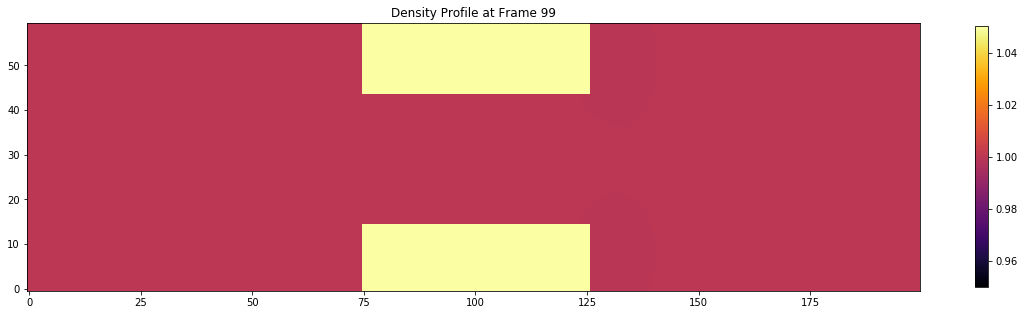

In [44]:
# This is for visualizing one frame
# First number represent frame number
# Change 0: density, 1: ux, 2: uy, 3: speed, 4: pressure
fr = 99
rho=load_file(outdir_pbc, fr)[0]
rho=channel(rho)
fig, ax = plt.subplots(figsize=(20,8))
plt.imshow(rho,cmap=cm.inferno,vmin=0.95,vmax=1.05)
fig.gca().invert_yaxis()
plt.colorbar(shrink=0.6)
plt.title("Density Profile at Frame %i" % fr)
fig.savefig('../figs/lbm_pbc_rho.png', bbox_inches='tight')
plt.show()

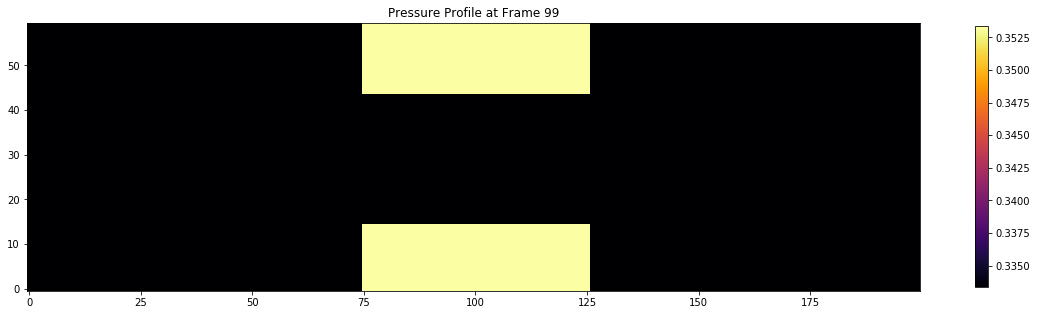

In [45]:
# This is for visualizing one frame
# First number represent frame number
# Change 0: density, 1: ux, 2: uy, 3: speed, 4: pressure
fr = 99
pressure=load_file(outdir_pbc, fr)[4]
pressure=channel(pressure)
fig, ax = plt.subplots(figsize=(20,8))
pMin = np.min(pressure)
pressure_scale = 0.02
vmin = pMin
vmax= pMin + pressure_scale 
plt.imshow(pressure,cmap=cm.inferno, vmin=vmin, vmax=vmax)
fig.gca().invert_yaxis()
plt.colorbar(shrink=0.6)
plt.title("Pressure Profile at Frame %i" % fr)
fig.savefig('../figs/lbm_pbc_pressure.png', bbox_inches='tight')
plt.show()

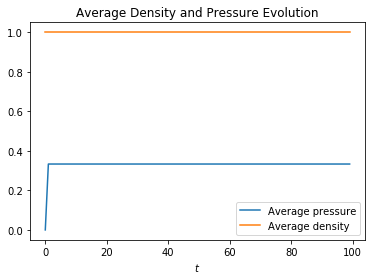

In [46]:
plt.figure()
ax = plt.subplot(111)
# For loops to plot ux at x = 100 every 10 frames
p_avg = np.zeros(100)
rho_avg = np.zeros(100)
for i in range(100):
    p=load_file(outdir_pbc, i)[4]
    rho = load_file(outdir_pbc, 1)[0]
    rho_avg[i] = np.average(rho)
    p_avg[i] = np.average(p)
plt.plot(np.arange(0,100,1),p_avg,label='Average pressure')
plt.plot(np.arange(0,100,1),rho_avg,label='Average density')
ax.legend()
ax.set_xlabel(r'$t$')
# ax.set_ylabel('$\overline{p}$')
ax.set_title('Average Density and Pressure Evolution')
plt.show()

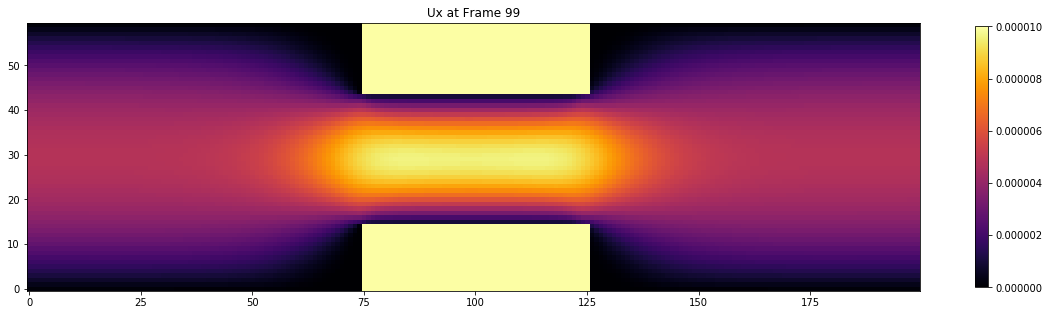

In [47]:
# This is for visualizing one frame
# First number represent frame number
# Change 0: density, 1: ux, 2: uy, 3: speed, 4: pressure
fr = 99
ux=load_file(outdir_pbc, fr)[1]
ux=channel(ux)
fig, ax = plt.subplots(figsize=(20,8))
plt.imshow(ux,cmap=cm.inferno,vmin=0,vmax=0.00001)
fig.gca().invert_yaxis()
plt.colorbar(shrink=0.6)
plt.title("Ux at Frame %i" % fr)
fig.savefig('../figs/lbm_pbc_ux.png', bbox_inches='tight')
plt.show()

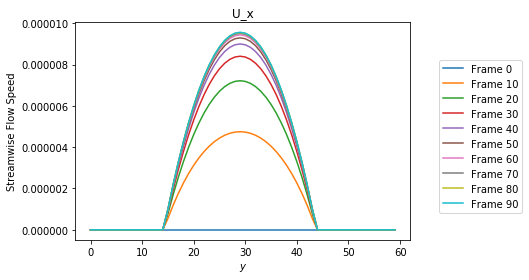

In [48]:
plt.figure()
ax = plt.subplot(111)
# For loops to plot ux at x = 100 every 10 frames
for i in range(0,100,10):
    ux=load_file(outdir_pbc, i)[1]
    plt.plot(np.arange(0,60,1),ux[:,100],label='Frame %i' % i)
ax.legend(bbox_to_anchor=(1.35, 0.85))
ax.set_xlabel(r'$y$')
ax.set_ylabel('Streamwise Flow Speed')
ax.set_title('U_x')
plt.show()

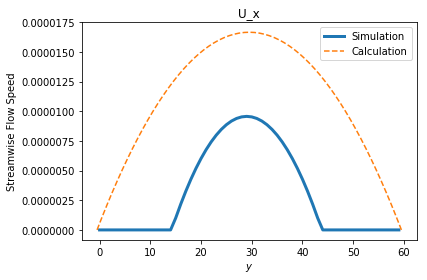

In [49]:
y = np.arange(0,61,1)
Re = 0.01
tau = 0.8
nu = (2*tau-1)/6
rho = 1
mu = rho*nu
nx = 200
ny = 60
umax = Re*nu/ny
forcetype = 8*mu*umax/ny/ny

ux_cal = forcetype/(2*mu)*y*(60-y)

ux=load_file(outdir_pbc, 99)[1]
plt.plot(np.arange(0,ny,1),ux[:,int(nx/2)],linewidth=3,label='Simulation')

plt.plot(y-0.5,ux_cal,'--',label='Calculation')
plt.legend()
plt.title('U_x')
plt.xlabel(r'$y$')
plt.ylabel('Streamwise Flow Speed')
plt.show()

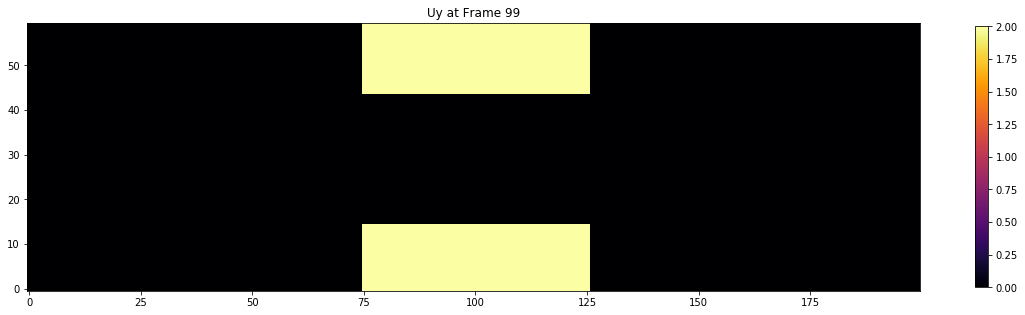

In [22]:
# This is for visualizing one frame
# First number represent frame number
# Change 0: density, 1: ux, 2: uy, 3: speed, 4: pressure
fr = 99
uy=load_file(outdir_pbc, fr)[2]
uy=channel(uy)
fig, ax = plt.subplots(figsize=(20,8))
plt.imshow(uy,cmap=cm.inferno)
fig.gca().invert_yaxis()
plt.colorbar(shrink=0.6)
plt.title("Uy at Frame %i" % fr)
fig.savefig('../figs/lbm_pbc_uy.png', bbox_inches='tight')
plt.show()

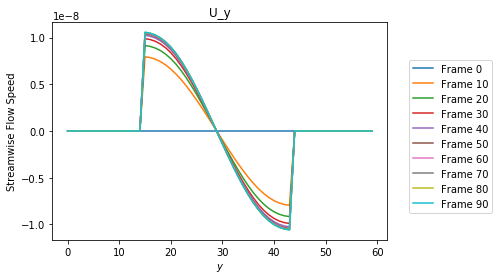

In [23]:
plt.figure()
ax = plt.subplot(111)
# For loops to plot uy at x = 100 every 10 frames
for i in range(0,100,10):
    uy=load_file(outdir_pbc, i)[2]
    plt.plot(np.arange(0,60,1),uy[:,100],label='Frame %i' % i)
ax.legend(bbox_to_anchor=(1.05, 0.85))
ax.set_xlabel(r'$y$')
ax.set_ylabel('Streamwise Flow Speed')
ax.set_title('U_y')
plt.show()

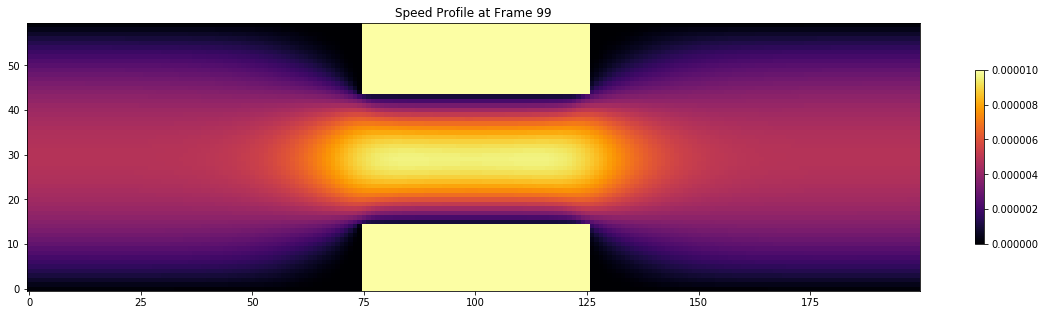

In [24]:
# This is for visualizing one frame
# First number represent frame number
# Change 0: density, 1: ux, 2: uy, 3: speed, 4: pressure
fr = 99
speed=load_file(outdir_pbc, fr)[3]
speed=channel(speed)
fig, ax = plt.subplots(figsize=(20,8))
plt.imshow(speed,cmap=cm.inferno,vmin=0,vmax=0.00001)
fig.gca().invert_yaxis()
plt.colorbar(shrink=0.6)
plt.title("Speed Profile at Frame %i" % fr)
fig.savefig('../figs/lbm_pbc_speed.png', bbox_inches='tight')
plt.show()

**Functions used to compute volume flow**

In [25]:
def channel_zero(mat):
    for j in range(60):
        for i in range(200):
            if (i>74 and i<126):
                if (j<15 or j>43):
                    mat[j][i] = 0.0
    return mat

In [26]:
def calc_volume_flow(rho, ux):
    """Compute the volume flow for this system"""
    # Compute the flux in the x-direction
    flux_x = rho * ux
    # Zero out flux in elements with tno fluid
    flux_x = channel_zero(flux_x)
    # Compute the flow at different x values
    flow_v = np.sum(flux_x, axis=0)
    # Estimate the overall volume flow as the mean of these flows
    return np.mean(flow_v)

**Sanity check - volume flow is almost the same at different x values**

In [32]:
rho=load_file(outdir_pbc, 99)[0]
ux=load_file(outdir_pbc, 99)[1]
# Compute the flux in the x-direction
flux_x = rho * ux
# Zero out flux in elements with tno fluid
flux_x = channel_zero(flux_x)
# Demonstrate that volume flow is very similar dependeng on where it is measured
for x_sample in range(0,200,20):
    flow = np.sum(flux_x[:,x_sample])
    print(f'Flow across x={x_sample} = {flow}.')

Flow across x=0 = 0.00019277864800000002.
Flow across x=20 = 0.000192778651.
Flow across x=40 = 0.000192778556.
Flow across x=60 = 0.00019277852019999997.
Flow across x=80 = 0.00019156021999999998.
Flow across x=100 = 0.00018860906399999997.
Flow across x=120 = 0.00019235048999999998.
Flow across x=140 = 0.000192778667123589.
Flow across x=160 = 0.000192778687.
Flow across x=180 = 0.00019277865699999998.


**Compute speed in the channel and volume flow rate**

In [28]:
speed=load_file(outdir_pbc, 99)[3]
print("Average velocity in the channel: %f"% np.average(speed))
print("Maximum velocity in the channel: %f"% np.max(speed))

Average velocity in the channel: 0.000003
Maximum velocity in the channel: 0.000010


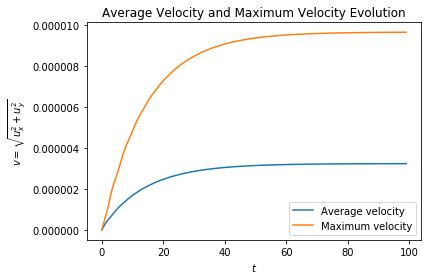

In [37]:
plt.figure()
ax = plt.subplot(111)

speed_avg = np.zeros(100)
speed_max = np.zeros(100)
for i in range(100):
    speed=load_file(outdir_pbc, i)[3]
    speed_avg[i] = np.average(speed)
    speed_max[i] = np.max(speed)
plt.plot(np.arange(0,100,1),speed_avg,label='Average velocity')
plt.plot(np.arange(0,100,1),speed_max,label='Maximum velocity')
ax.legend()
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$v=\sqrt{u_x^2+u_y^2}$')
ax.set_title('Average Velocity and Maximum Velocity Evolution')
plt.show()

In [34]:
rho=load_file(outdir_pbc, 99)[0]
ux=load_file(outdir_pbc, 99)[1]
volume_flow = calc_volume_flow(rho, ux)
print(f'Volume flow = {volume_flow:0.7f}')

Volume flow = 0.0001921


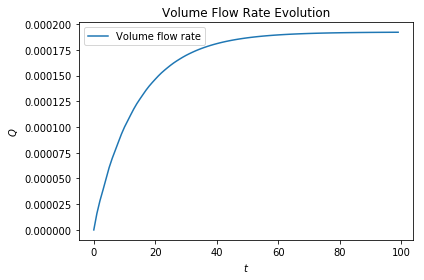

In [39]:
plt.figure()
ax = plt.subplot(111)

volume_flow_total = np.zeros(100)
for i in range(100):
    rho=load_file(outdir_pbc, i)[0]
    ux=load_file(outdir_pbc, i)[1]
    volume_flow=calc_volume_flow(rho, ux)
    volume_flow_total[i] = volume_flow
plt.plot(np.arange(0,100,1),volume_flow_total,label='Volume flow rate')
ax.legend()
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$Q$')
ax.set_title('Volume Flow Rate Evolution')
plt.show()

## Problem 1.2: Mixed

In [50]:
outdir_mbc = "lbm_mbc_Re001.out/"

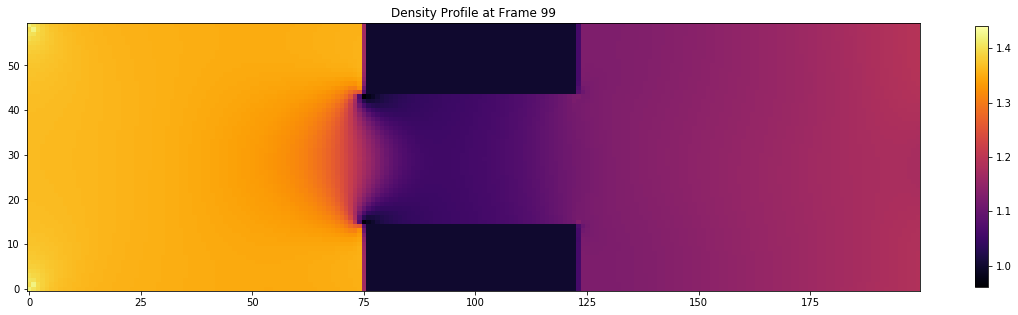

In [128]:
# This is for visualizing one frame
# First number represent frame number
# Change 0: density, 1: ux, 2: uy, 3: speed
fr = 99
rho=load_file(outdir_mbc, fr)[0]
# rho=channel(rho)
fig, ax = plt.subplots(figsize=(20,8))
plt.imshow(rho,cmap=cm.inferno,vmin=0.96,vmax=1.44)
fig.gca().invert_yaxis()
plt.colorbar(shrink=0.6)
plt.title("Density Profile at Frame %i" % fr)
fig.savefig('../figs/lbm_mbc_rho.png', bbox_inches='tight')
plt.show()

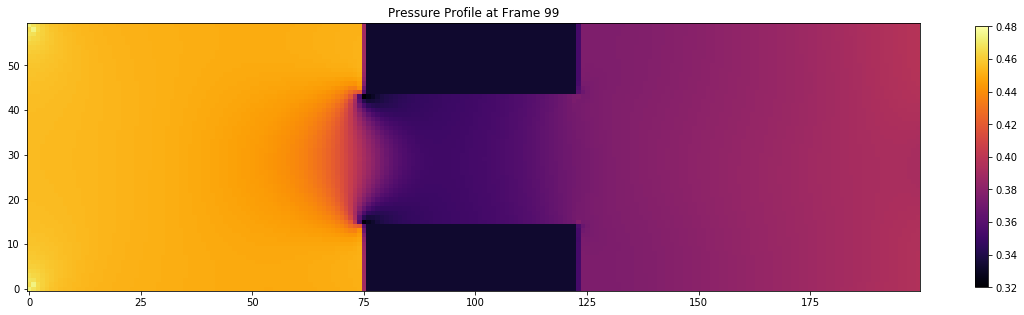

In [129]:
# This is for visualizing one frame
# First number represent frame number
# Change 0: density, 1: ux, 2: uy, 3: speed, 4: pressure
fr = 99
pressure=load_file(outdir_mbc, fr)[4]
# pressure=channel(pressure)
fig, ax = plt.subplots(figsize=(20,8))
pMin = np.min(pressure)
pMax = np.max(pressure)
deltaP = pMax - pMin
pressure_scale = 0.08
vmin = pMin
vmax= pMin + pressure_scale 
plt.imshow(pressure,cmap=cm.inferno,vmin=0.32,vmax=0.48)
fig.gca().invert_yaxis()
plt.colorbar(shrink=0.6)
plt.title("Pressure Profile at Frame %i" % fr)
fig.savefig('../figs/lbm_mbc_pressure.png', bbox_inches='tight')
plt.show()

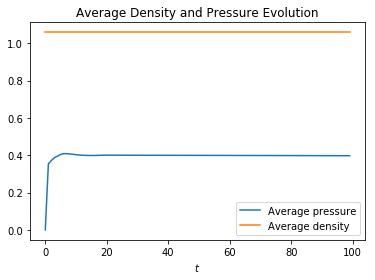

In [116]:
plt.figure()
ax = plt.subplot(111)
# For loops to plot ux at x = 100 every 10 frames
p_avg = np.zeros(100)
rho_avg = np.zeros(100)
for i in range(100):
    p=load_file(outdir_mbc, i)[4]
    rho = load_file(outdir_mbc, 1)[0]
    rho_avg[i] = np.average(rho)
    p_avg[i] = np.average(p)
plt.plot(np.arange(0,100,1),p_avg,label='Average pressure')
plt.plot(np.arange(0,100,1),rho_avg,label='Average density')
ax.legend()
ax.set_xlabel(r'$t$')
# ax.set_ylabel('$\overline{p}$')
ax.set_title('Average Density and Pressure Evolution')
plt.show()

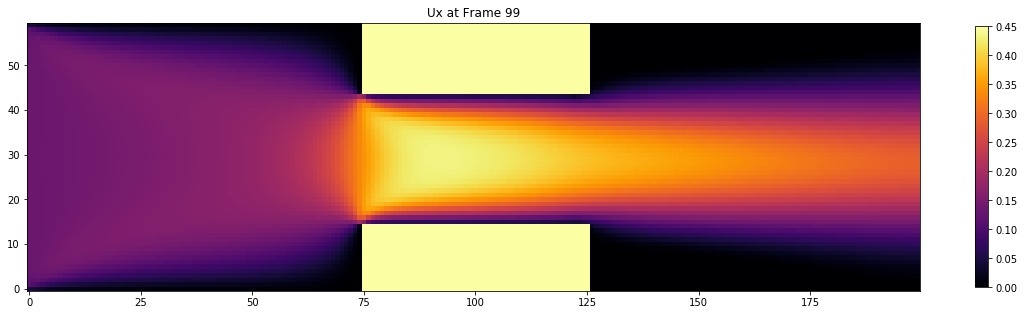

In [119]:
# This is for visualizing one frame
# First number represent frame number
# Change 0: density, 1: ux, 2: uy, 3: speed
fr = 99
ux=load_file(outdir_mbc, fr)[1]
ux=channel(ux)
fig, ax = plt.subplots(figsize=(20,8))
plt.imshow(ux,cmap=cm.inferno,vmin=0,vmax=0.45)
fig.gca().invert_yaxis()
plt.colorbar(shrink=0.6)
plt.title("Ux at Frame %i" % fr)
fig.savefig('../figs/lbm_mbc_ux.png', bbox_inches='tight')
plt.show()

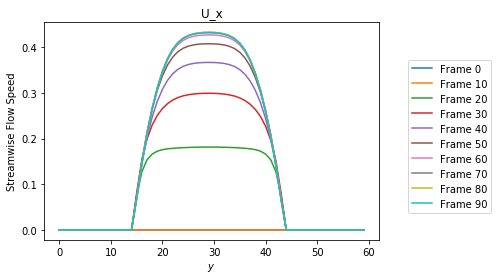

In [130]:
plt.figure()
ax = plt.subplot(111)
# For loops to plot ux at x = 100 every 10 frames
for i in range(0,100,10):
    ux=load_file(outdir_mbc, i)[1]
    plt.plot(np.arange(0,60,1),ux[:,100],label='Frame %i' % i)
ax.legend(bbox_to_anchor=(1.35, 0.85))
ax.set_xlabel(r'$y$')
ax.set_ylabel('Streamwise Flow Speed')
ax.set_title('U_x')
plt.show()

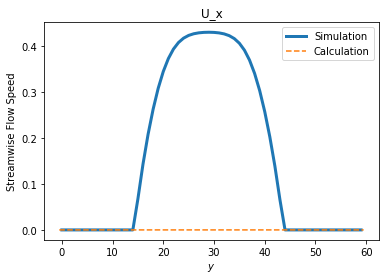

In [104]:
y = np.arange(0,61,1)
Re = 0.01
tau = 0.8
nu = (2*tau-1)/6
rho = 1
mu = rho*nu
nx = 200
ny = 60
umax = Re*nu/ny
forcetype = 8*mu*umax/ny/ny

ux_cal = forcetype/(2*mu)*y*(60-y)

ux=load_file(outdir_mbc, 99)[1]
plt.plot(np.arange(0,ny,1),ux[:,int(nx/2)],linewidth=3,label='Simulation')

plt.plot(y-0.5,ux_cal,'--',label='Calculation')
plt.legend()
plt.title('U_x')
plt.xlabel(r'$y$')
plt.ylabel('Streamwise Flow Speed')
plt.show()

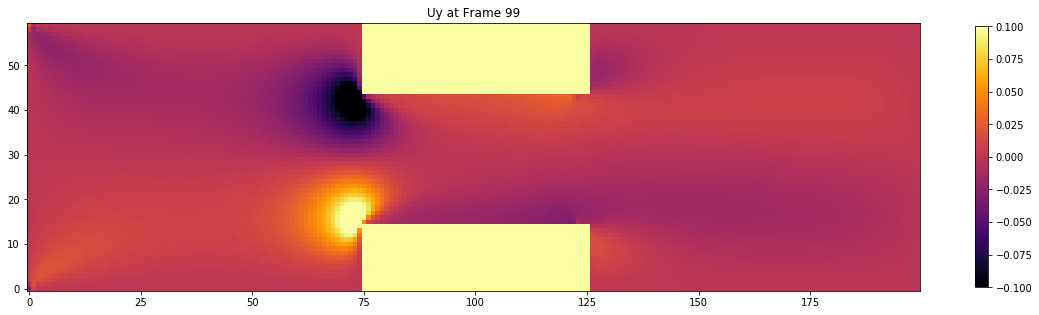

In [105]:
# This is for visualizing one frame
# First number represent frame number
# Change 0: density, 1: ux, 2: uy, 3: speed
fr = 99
uy=load_file(outdir_mbc, fr)[2]
uy=channel(uy)
fig, ax = plt.subplots(figsize=(20,8))
plt.imshow(uy,cmap=cm.inferno,vmin=-0.02,vmax=0.02)
fig.gca().invert_yaxis()
plt.colorbar(shrink=0.6)
plt.title("Uy at Frame %i" % fr)
fig.savefig('../figs/lbm_mbc_uy.png', bbox_inches='tight')
plt.show()

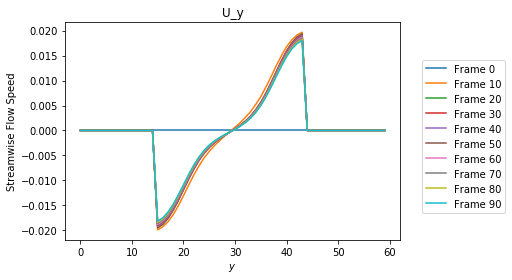

In [106]:
plt.figure()
ax = plt.subplot(111)
# For loops to plot uy at x = 100 every 10 frames
for i in range(0,100,10):
    uy=load_file(outdir_mbc, i)[2]
    plt.plot(np.arange(0,60,1),uy[:,100],label='Frame %i' % i)
ax.legend(bbox_to_anchor=(1.05, 0.85))
ax.set_xlabel(r'$y$')
ax.set_ylabel('Streamwise Flow Speed')
ax.set_title('U_y')
plt.show()

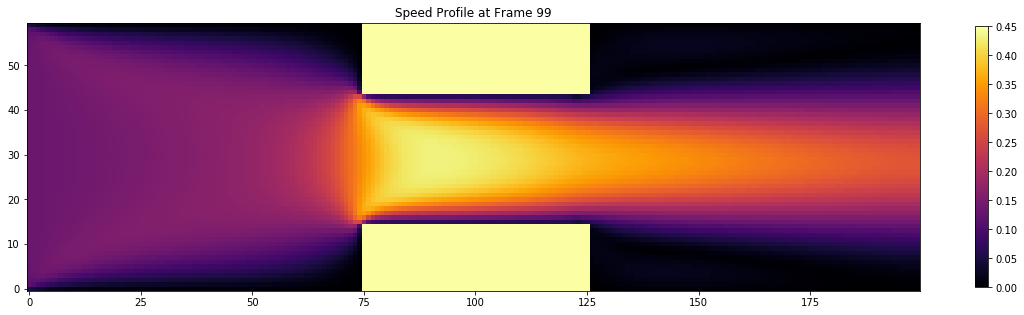

In [90]:
# This is for visualizing one frame
# First number represent frame number
# Change 0: density, 1: ux, 2: uy, 3: speed
fr = 99
speed=load_file(outdir_mbc, fr)[3]
speed=channel(speed)
fig, ax = plt.subplots(figsize=(20,8))
plt.imshow(speed,cmap=cm.inferno,vmin=0,vmax=0.45)
fig.gca().invert_yaxis()
plt.colorbar(shrink=0.6)
plt.title("Speed Profile at Frame %i" % fr)
fig.savefig('../figs/lbm_mbc_speed.png', bbox_inches='tight')
plt.show()

**Compute speed in the channel and volume flow rate**

In [108]:
speed=load_file(outdir_mbc, 99)[3]
print("Average velocity in the channel: %f"% np.average(speed))
print("Maximum velocity in the channel: %f"% np.max(speed))

Average velocity in the channel: 0.142811
Maximum velocity in the channel: 0.434140


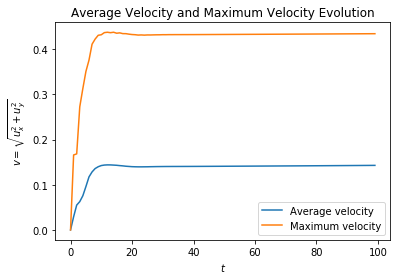

In [107]:
plt.figure()
ax = plt.subplot(111)

speed_avg = np.zeros(100)
speed_max = np.zeros(100)
for i in range(100):
    speed=load_file(outdir_mbc, i)[3]
    speed_avg[i] = np.average(speed)
    speed_max[i] = np.max(speed)
plt.plot(np.arange(0,100,1),speed_avg,label='Average velocity')
plt.plot(np.arange(0,100,1),speed_max,label='Maximum velocity')
ax.legend()
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$v=\sqrt{u_x^2+u_y^2}$')
ax.set_title('Average Velocity and Maximum Velocity Evolution')
plt.show()

In [94]:
rho=load_file(outdir_mbc, 99)[0]
ux=load_file(outdir_mbc, 99)[1]
volume_flow = calc_volume_flow(rho, ux)
print(f'Volume flow = {volume_flow:0.6f}')

Volume flow = 9.893413


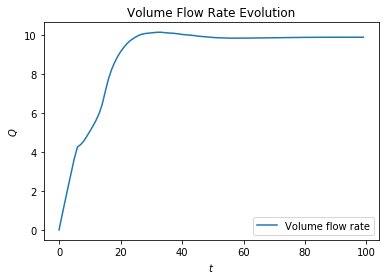

In [96]:
plt.figure()
ax = plt.subplot(111)

volume_flow_total = np.zeros(100)
for i in range(100):
    rho=load_file(outdir_mbc, i)[0]
    ux=load_file(outdir_mbc, i)[1]
    volume_flow=calc_volume_flow(rho, ux)
    volume_flow_total[i] = volume_flow
plt.plot(np.arange(0,100,1),volume_flow_total,label='Volume flow rate')
ax.legend()
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$Q$')
ax.set_title('Volume Flow Rate Evolution')
plt.show()

**Run Periodic Simulation for Multiple widths w**

In [142]:
# Different widths w that were simulated
ws = [10, 20, 30, 40, 50]

# Array of volume flow vs. width w
flow_pbc_w = np.zeros(len(ws))

# Iterate over different values of w that were simulated 
for i, w in enumerate(ws):
    outdir_pbc_w = f"lbm_pbc_Re001.out/width_{w}/"
    rho=load_file(outdir_pbc_w, fr)[0]
    ux=load_file(outdir_pbc_w, fr)[1]
    volume_flow = calc_volume_flow(rho, ux)
    flow_pbc_w[i] = volume_flow
    print(f'Volume flow for w={w} is {volume_flow:0.3f}.')

Volume flow for w=10 is 0.214.
Volume flow for w=20 is 1.163.
Volume flow for w=30 is 3.046.
Volume flow for w=40 is 5.515.
Volume flow for w=50 is 8.097.


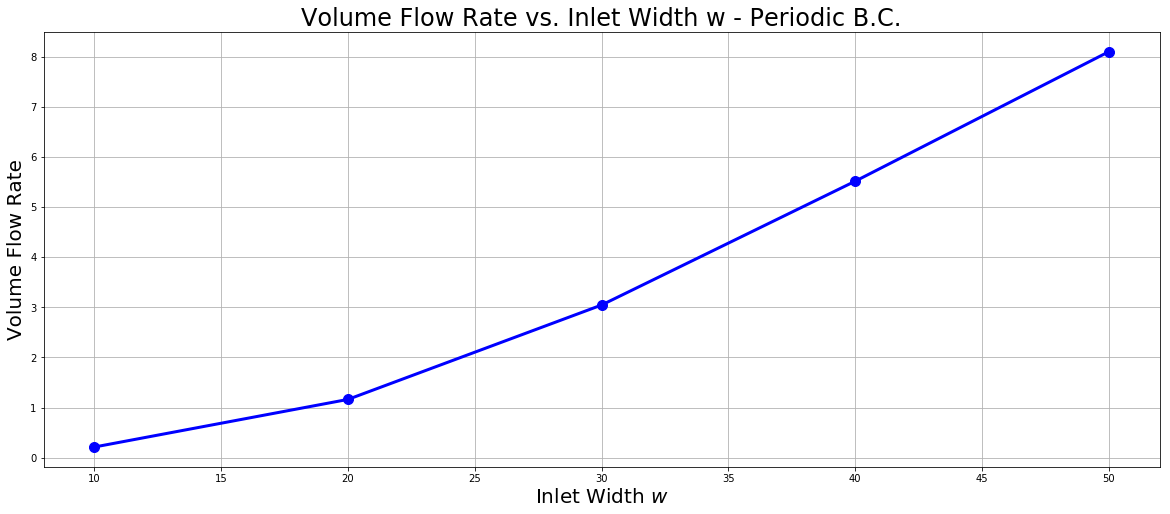

In [143]:
fig, ax = plt.subplots(figsize=(20,8))
ax.set_title('Volume Flow Rate vs. Inlet Width w - Periodic B.C.', fontsize=24)
ax.set_xlabel('Inlet Width $w$', fontsize=20)
ax.set_ylabel('Volume Flow Rate', fontsize=20)
ax.plot(ws, flow_pbc_w, color='b', marker='o', linewidth=3.0, markersize=10)
ax.grid()
fig.savefig('../figs/lbm_pbc_flow_vs_w.png', bbox_inches='tight')

**Run Non-Periodic Simulation for Multiple widths w**

In [144]:
# Array of volume flow vs. width w
flow_mbc_w = np.zeros(len(ws))

# Iterate over different values of w that were simulated 
for i, w in enumerate(ws):
    outdir_mbc_w = f"lbm_mbc_Re001.out/width_{w}/"
    rho=load_file(outdir_mbc_w, fr)[0]
    ux=load_file(outdir_mbc_w, fr)[1]
    volume_flow = calc_volume_flow(rho, ux)
    flow_pbc_w[i] = volume_flow
    print(f'Volume flow for w={w} is {volume_flow:0.3f}.')

Volume flow for w=10 is 0.264.
Volume flow for w=20 is 0.772.
Volume flow for w=30 is 1.046.
Volume flow for w=40 is 1.103.
Volume flow for w=50 is 1.087.


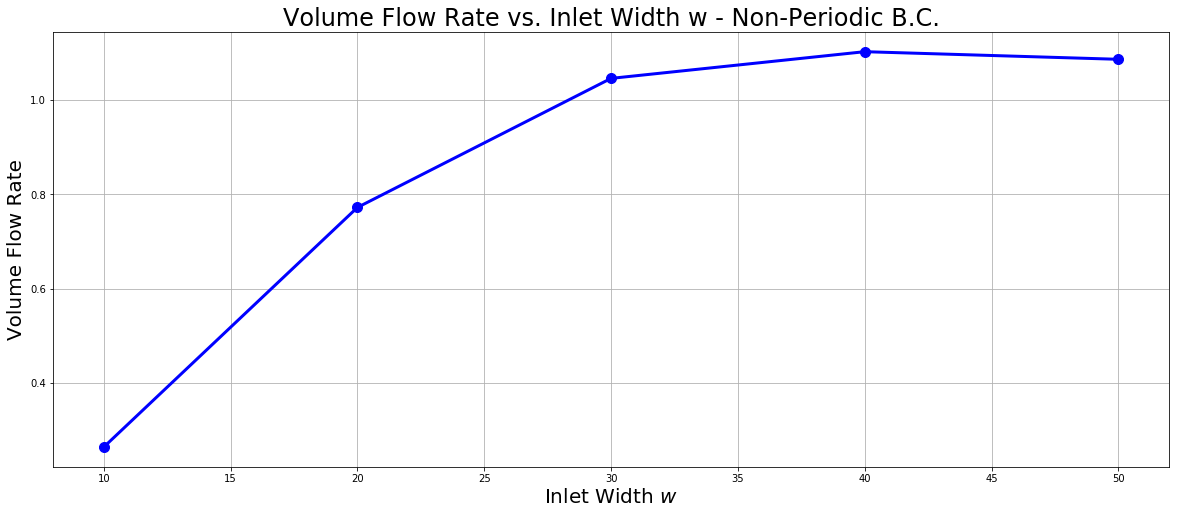

In [145]:
fig, ax = plt.subplots(figsize=(20,8))
ax.set_title('Volume Flow Rate vs. Inlet Width w - Non-Periodic B.C.', fontsize=24)
ax.set_xlabel('Inlet Width $w$', fontsize=20)
ax.set_ylabel('Volume Flow Rate', fontsize=20)
ax.plot(ws, flow_pbc_w, color='b', marker='o', linewidth=3.0, markersize=10)
ax.grid()
fig.savefig('../figs/lbm_mbc_flow_vs_w.png', bbox_inches='tight')

**Compute pressure at the narrowing with the Bernoulli Estimate for the periodic flow**

In [84]:
# Load the density
rho = load_file(outdir_pbc, fr)[0]
rho = channel(rho)

# Load the speed
speed=load_file(outdir_pbc, fr)[3]
speed=channel(speed)

# Load the pressure
pressure = load_file(outdir_pbc, fr)[4]
pressure = channel(pressure)

# Compute averages at x=0
# rho0, average density at x=0
rho0 = np.mean(rho[:,0])
# p0, the average pressure at x=0
p0 = np.mean(pressure[:,0])
# u0, the average speed at x=0
u0 = np.mean(speed[:,0])
# Bernoulli quantity 1/2 rho p^2 + p0
bern0 = 0.5 * rho0 * u0 * u0 + p0

# Compute averages at x=100, the center of the narrowing
# Need to take the slice of i-indices from 15:44 to match the channel
rhoi = np.mean(rho[15:44,100])
pi = np.mean(pressure[15:44,100])
ui = np.mean(speed[15:44, 100])
berni = 0.5 * rhoi * ui * ui + pi

# Print results
print(f'Bernoulli quantity 1/2 rho u^2 + p at x=0 and x=100 (center of narrowing):')
print(f'At x=0,   p0 = {p0:0.3f}, u0 = {u0:0.3f}, Bernoulli = {bern0:0.3f}')
print(f'At x=100, pi = {pi:0.3f}, ui = {ui:0.3f}, Bernoulli = {berni:0.3f}')

Bernoulli quantity 1/2 rho u^2 + p at x=0 and x=100 (center of narrowing):
At x=0,   p0 = 0.339, u0 = 0.050, Bernoulli = 0.340
At x=100, pi = 0.334, ui = 0.102, Bernoulli = 0.339


**Compute the Pressure vs. Bernoulli Estimate for Varying Viscosity $\nu$**

In [147]:
def calc_pressure_narrow(tau_i):
    """
    Calculate the estimated pressure at the narrowing using the Bernoulli equation.
    tau_i is an integer in [65, 70, 75, 80, 85, 90, 95, 100]
    """
    # The output directory for this tau
    outdir_pbc_tau = f"lbm_pbc_Re001.out/tau_{tau_i}/"

    # Load the density
    rho = load_file(outdir_pbc_tau, fr)[0]
    rho = channel(rho)

    # Load the speed
    speed=load_file(outdir_pbc_tau, fr)[3]
    speed=channel(speed)

    # Load the pressure
    pressure = load_file(outdir_pbc_tau, fr)[4]
    pressure = channel(pressure)

    # Compute averages at x=0
    # rho0, average density at x=0
    rho0 = np.mean(rho[:,0])
    # p0, the average pressure at x=0
    p0 = np.mean(pressure[:,0])
    # u0, the average speed at x=0
    u0 = np.mean(speed[:,0])
    # Bernoulli quantity 1/2 rho p^2 + p0
    bern0 = 0.5 * rho0 * u0 * u0 + p0

    # Compute averages at x=100, the center of the narrowing
    # Need to take the slice of i-indices from 15:44 to match the channel
    # rhoi = np.mean(rho[15:44,100])
    rhoi = 1.0
    pi = np.mean(pressure[15:44,100])
    ui = np.mean(speed[15:44, 100])
    # berni = 0.5 * rhoi * ui * ui + pi
    # Compute the implied pressure at the narrowing
    pi_bern = bern0 - 0.5 * rhoi * ui * ui
    # Return the simulated and implied pressure
    return (pi, pi_bern)

In [148]:
# Array of tau_i values simulated
tau_is = [65, 70, 75, 80, 85, 90, 95, 100]
# Array of taus
taus = [tau_i / 100.0 for tau_i in tau_is]
# The kinematic viscosity nu = (2*tau-1)/6
nus = [(2.0*tau - 1.0)/6.0 for tau in taus]

# Initialize arrays for simulated and bernoulli-implied pressure at the narrowing
pressure_sim = np.zeros(len(taus))
pressure_bern = np.zeros(len(taus))

# Populate the pressures calculated both ways
for i, tau_i in enumerate(tau_is):
    (ps, pb) = calc_pressure_narrow(tau_i)
    pressure_sim[i] = ps
    pressure_bern[i] = pb
    tau = taus[i]
    nu = nus[i]
    print(f'tau={tau:0.2f}, nu={nu:0.4f}, pressure sim = {ps:0.8f}, bernoulli = {pb:0.8f}')

tau=0.65, nu=0.0500, pressure sim = 0.33431955, bernoulli = 0.32575038
tau=0.70, nu=0.0667, pressure sim = 0.33425131, bernoulli = 0.33176960
tau=0.75, nu=0.0833, pressure sim = 0.33413721, bernoulli = 0.33443680
tau=0.80, nu=0.1000, pressure sim = 0.33402017, bernoulli = 0.33546621
tau=0.85, nu=0.1167, pressure sim = 0.33392100, bernoulli = 0.33569421
tau=0.90, nu=0.1333, pressure sim = 0.33384207, bernoulli = 0.33557592
tau=0.95, nu=0.1500, pressure sim = 0.33377793, bernoulli = 0.33533507
tau=1.00, nu=0.1667, pressure sim = 0.33372297, bernoulli = 0.33507222


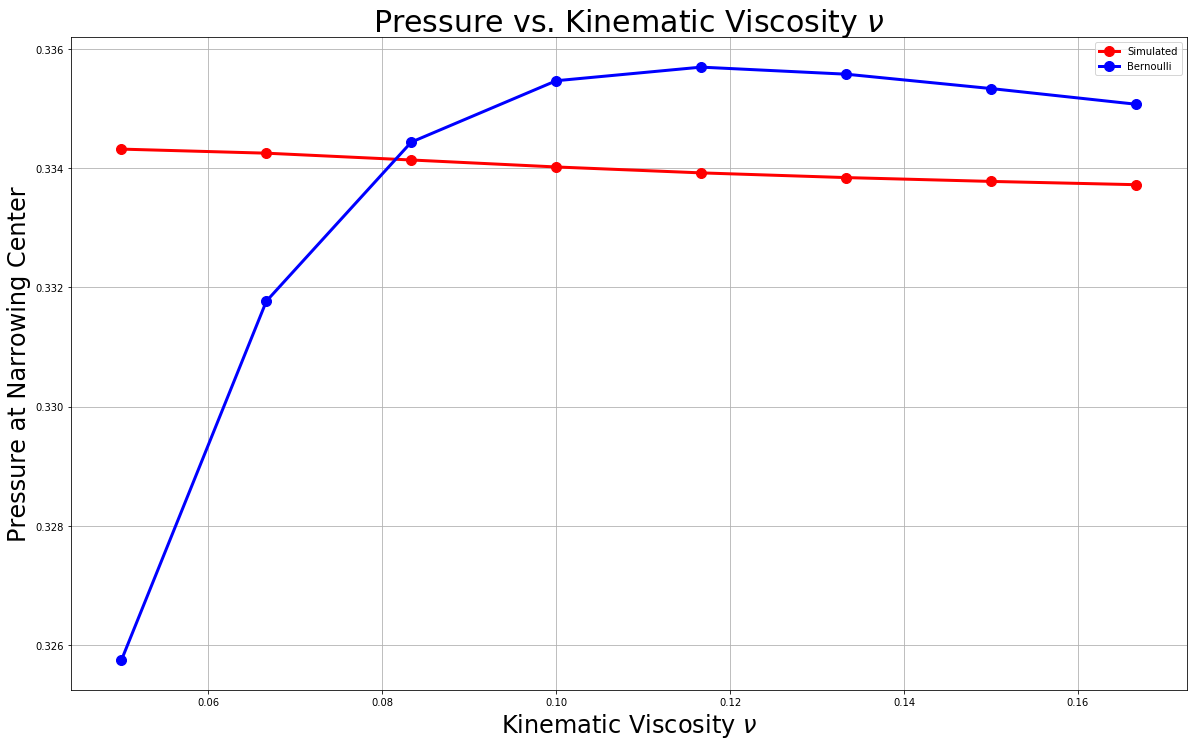

In [149]:
fig, ax = plt.subplots(figsize=(20,12))
ax.set_title('Pressure vs. Kinematic Viscosity $\\nu$', fontsize=30)
ax.set_xlabel('Kinematic Viscosity $\\nu$', fontsize=24)
ax.set_ylabel('Pressure at Narrowing Center', fontsize=24)
ax.plot(nus, pressure_sim, color='red', marker='o', label='Simulated', linewidth=3, markersize=10)
ax.plot(nus, pressure_bern, color='blue', marker='o', label='Bernoulli', linewidth=3, markersize=10)
ax.legend()
ax.grid()
fig.savefig('../figs/lbm_pbc_pressure_vs_nu.png', bbox_inches='tight')
plt.show()